In [126]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import simpy
import control

In [127]:
plt.rcParams['figure.figsize'] = [15,8] # size of plots in inches

In [128]:
# Define the parameters
N = 31
R = 0.15 - (0.001 * N);  # ohms
Te = 0.01  # seconds
cF = cF = 0.8 + (0.05 * N);  # Wb
J = (cF * cF * Tm) / (R);  # kg m^2

# Define the state-space model
A = [[-1/Te, -cF/(R*Te)],
     [cF/J, 0]]
B = [[1/(R*Te), 0], 
     [0, -1/J]]
C = [[1, 0],
     [0, 1]]
D = [[0, 0], 
     [0, 0]]
sys = control.StateSpace(A, B, C, D)

# Define the input and initial conditions
t = np.linspace(0, 10, 1001)
t = t[:-1]
U = np.ones(1000)
U[0] = 0
Mc = np.ones(1000)
U[0] = 0
x0 = [0, 0]

In [129]:
# Simulate the model
t, y, xout = control.forced_response(sys, T=t, U=np.stack((U, Mc), axis=0), X0=x0, return_x=True)

In [130]:
t.shape, y.shape, xout.shape, y[0, :].shape

((1000,), (2, 1000), (2, 1000), (1000,))

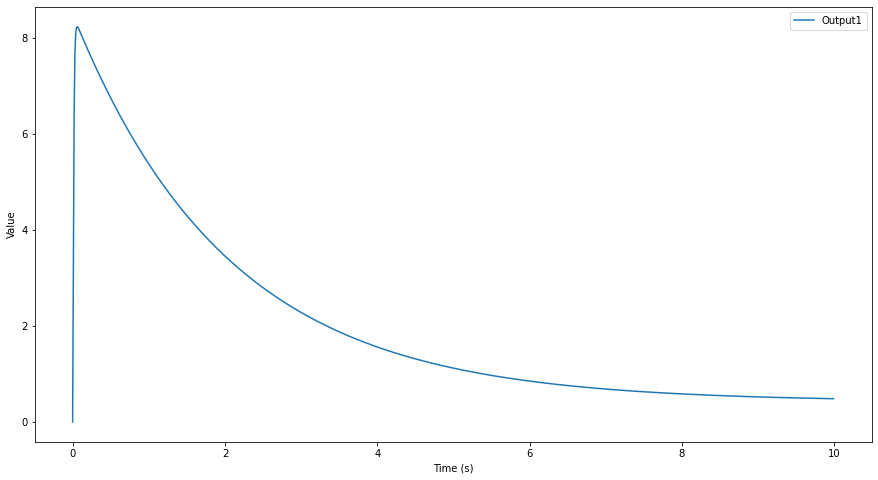

In [131]:
# Plot the results
plt.plot(t, y[0, :], label='Output1')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

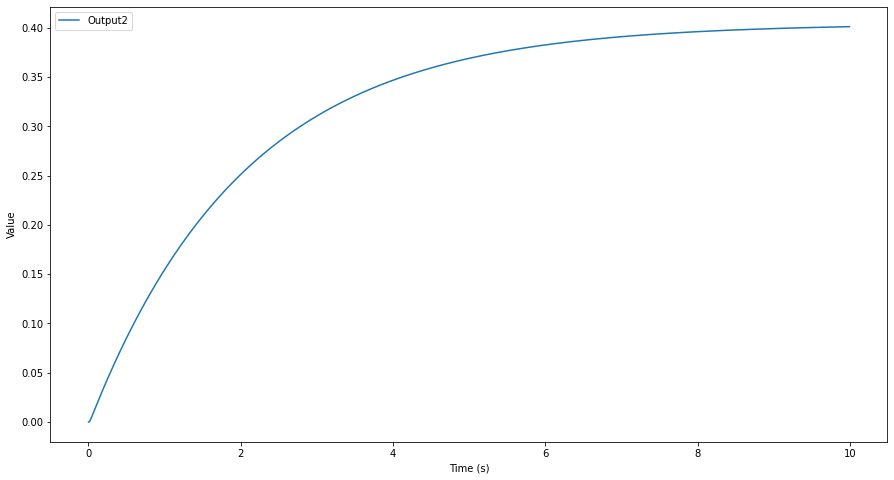

In [132]:
plt.plot(t, y[1, :], label='Output2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

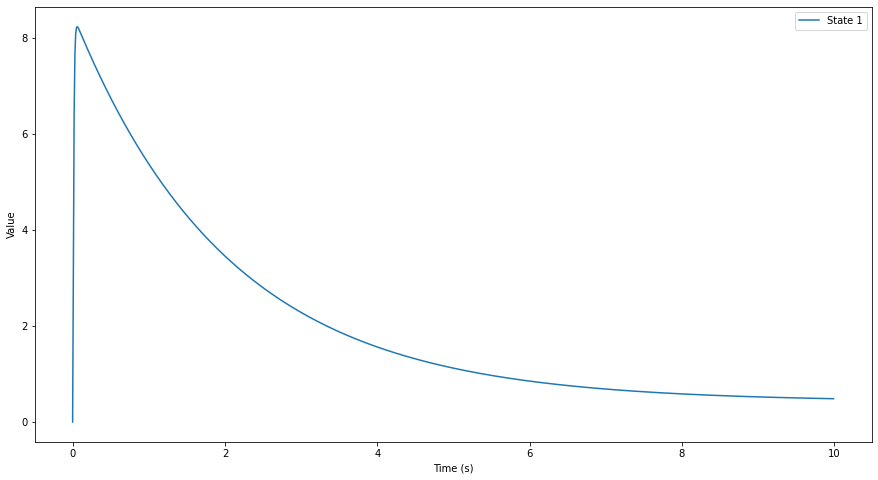

In [124]:
plt.plot(t, xout[0], label='State 1')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

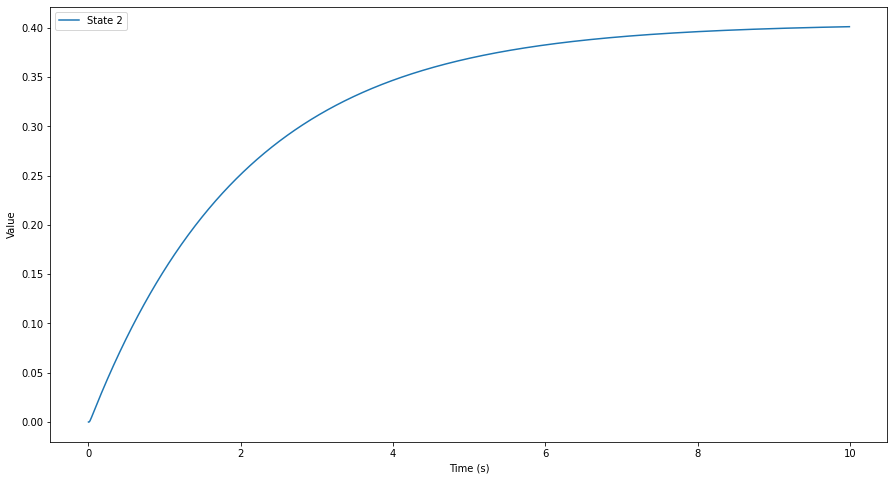

In [125]:
plt.plot(t, xout[1], label='State 2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

In [105]:
t.shape, t

((1000,),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
        1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
        1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
        1.43, 1.44, 1.45, 1.